# Homework 1
## Arnold Leigh Ryan Choa - 32038144
## PHYS 410

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #for tabling results

### Question  1

#### Functions for Simple Bisection and 1-D Newton's Method:

In [2]:
"""
Code for a simple bisection
[a,b] signifies the starting interval.
givenFunction is the function of the sepcific problem we want
delta is a threshold value to function(x) for saying approximation is good enough
"""
def bisection(a,b, givenFunction, delta = 0.01):
    if a>b:
        # Checking if a <= b
        return bisection(b,a, givenFunction, delta)
    mid = (a+b)/2
    if abs(givenFunction(mid)) < delta: # Test delta against value of root
        return mid # Return midpoint of interval if bisection is  satisfied
    else:
        if givenFunction(a)*givenFunction(mid) < 0:
            return bisection(a, mid, givenFunction, delta)
        else:
            return bisection(mid, b, givenFunction, delta)

In [3]:
"""
Code for a 1-D Newton's method
x signifies the starting point.
givenFunction is the function of the sepcific problem we want
givenDerivative is the function of the sepcific problem we want
delta is a threshold value to function(x) for saying approximation is good enough
a is the learning rate
"""
def one_Newton(x, givenFunction, givenDerivative, delta, a):
    value = givenFunction(x)
    slope = givenDerivative(x)
    
    if abs(value) < delta:
        return x
    else:
        xNew = x - (value/slope)
        if abs(xNew - x) < a:
            xNew = x - a*np.sign(value/slope)
        return one_Newton(xNew, givenFunction, givenDerivative, delta, a)

#### Function and Derivative for Question 1

In [4]:
def q1Function(x):
    return(6425*x**8 - 12012*x**6 + 6930*x**4 - 1260*x**2 + 35)/128
    
def q1Derivative(x):
    return(8*6425*x**7 - 6*12012*x**5 + 4*6930*x**3 - 2*1260*x)/128

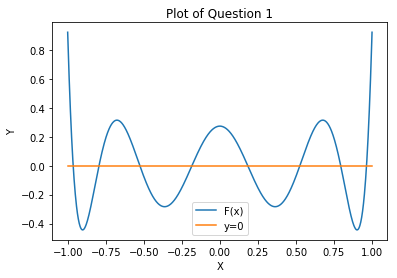

In [5]:
x = np.linspace(-1,1,1000)
y = np.apply_along_axis(q1Function,0, x)
y2 = np.zeros(len(x))

plt.figure(1)
plt.plot(x,y, label = "F(x)")
plt.plot(x,y2, label = "y=0")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Plot of Question 1")
plt.show()

By plotting, we now that there are 8 single roots in between $[-1,1]$.
We also now, by observation, that there are exactly one root in these intervals:
$\{[-1,-0.90],[-0.90,-0.60],[-0.60,-0.30],[-0.30,0.0],[0.0,0.30],[0.30,0.60],[0.60,0.90],[0.90,1.0]\}$

We want to use a hybrid method of Bisection and Newton. To do that, we first have to write a function that hybridizes them:

In [6]:
"""
hybrid hybridizes the bisection and 1D Newtion method
[a,b] signify the starting interval.
givenFunction is the function of the sepcific problem we want
givenDerivative is the function of the sepcific problem we want
bis_delta is a threshold value to function(x) for saying bisection is good enough
newton_delta is a threshold value to function(x) for saying bisection is good enough
newton_a is the max learning rate for the 1D newton
"""
def hybrid(a,b, bis_delta, newton_delta, newton_a, givenFunction, givenDerivative):
    x0 = bisection(a,b,givenFunction, bis_delta)
    root = one_Newton(x0,givenFunction, givenDerivative, newton_delta, newton_a)
    return root


Now, calculating approximates roots with threshold deltas:

In [7]:
cols = ["Interval Start", "Interval End", "Approximate Root", "Value of Approx"]
data = []
candidates = [[-1,-0.90],[-0.90,-0.60],[-0.60,-0.30],[-0.30,0.0],[0.0,0.30],[0.30,0.60],[0.60,0.90],[0.90,1.0]]
bisectionDelta = 0.001
newtonDelta = 0.000001
newtonA = 0.00000001

for c in candidates:
    a = c[0]
    b = c[1]
    root = hybrid(a, b, bisectionDelta, newtonDelta, newtonA, q1Function, q1Derivative)
    data.append([c[0],c[1],root, q1Function(root)])

p = pd.DataFrame(data, columns=cols)
p

,Interval Start,Interval End,Approximate Root,Value of Approx
0,-1.0,-0.9,-0.963787,6.548784e-08
1,-0.9,-0.6,-0.794161,-7.321224e-08
2,-0.6,-0.3,-0.525686,2.095979e-08
3,-0.3,0.0,-0.183435,-5.958460e-10
4,0.0,0.3,0.183435,-5.958460e-10
5,0.3,0.6,0.525686,2.095979e-08
6,0.6,0.9,0.794161,-7.321224e-08
7,0.9,1.0,0.963787,6.548784e-08


Plotting the approximate roots on the graph:

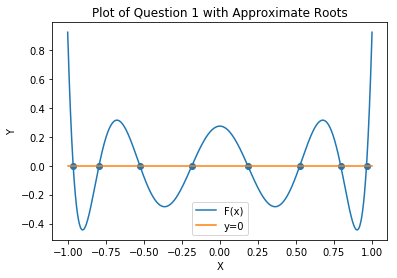

In [8]:
x = np.linspace(-1,1,1000)
y = np.apply_along_axis(q1Function,0, x)
y2 = np.zeros(len(x))

plt.figure(2)
plt.plot(x,y, label = "F(x)")
plt.plot(x,y2, label = "y=0")
plt.scatter(p["Approximate Root"], p["Value of Approx"], label=None)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Plot of Question 1 with Approximate Roots")
plt.show()

### Question  2

#### Function for n-D Newton's Method:

In [9]:
"""
Code for a n-D Newton's method
X signifies the starting point. This is a 1xn array
givenFunctions is an array of functions of the sepcific problem we want. Should be a 1xn array.
givenDerivatives is a Jacobian matrix of partial derivatives of the sepcific problem we want. Should an nxn matrix
delta is a threshold error for saying approximation is good enough. All functions must fall within threshold.
"""
def n_Newton(X, givenFunctions, givenDerivatives, delta):
    b = np.array([g(X) for g in givenFunctions]) # Values of each function at X
    J = np.array([np.array([g(X) for g in G]) for G in givenDerivatives]) # Jacobian Matrix evaluated at X
    
    if all([abs(x) < delta for x in b]):
        return X
    else:
        dr = np.linalg.solve(J, -b) #Python's answer to MATLAB's linsolve
        xNew = X + dr
        return n_Newton(xNew, givenFunctions, givenDerivatives, delta)

For this question, we have to deal with a 2-variable system, so we have two functions:

In [15]:
def q2Function1(X): # Function for Function 1
    x1 = X[0]
    x2 = X[1]
    return(x1**2 - 2*x1 - x2 + 0.5)
    
def q2Derivative11(X): #Partial Derivative of Function 1 on x1
    x1 = X[0]
    x2 = X[1]
    return(2*x1 - 2)

def q2Derivative12(X): #Partial Derivative of Function 1 on x2
    x1 = X[0]
    x2 = X[1]
    return(-1)

def q2Function2(X): # Function for Function 2
    x1 = X[0]
    x2 = X[1]
    return(x1**2 + 4*x2**2 - 4)
    
def q2Derivative21(X): #Partial Derivative of Function 2 on x1
    x1 = X[0]
    x2 = X[1]
    return(2*x1)

def q2Derivative22(X): #Partial Derivative of Function 2 on x2
    x1 = X[0]
    x2 = X[1]
    return(8*x2)

After declaring our functions and partial derivatives, it is now time to build the functional vector as well as the Jacobian Matrix:

In [16]:
F = [q2Function1, q2Function2] #Functional vector
J = [[q2Derivative11, q2Derivative12],[q2Derivative21, q2Derivative22]] #Jacobian Matrix

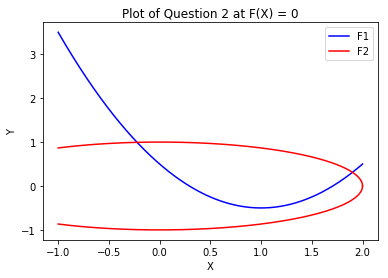

In [12]:
x = np.linspace(-1,2,2000)
y1 = np.apply_along_axis(lambda x: x**2 - 2*x + 0.5, 0, x)
y21 = np.apply_along_axis(lambda x: -((-x**2 + 4)/4)**0.5, 0, x)
y22 = np.apply_along_axis(lambda x: ((-x**2 + 4)/4)**0.5, 0, x)

plt.figure(3)
plt.plot(x,y1, color = 'b', label="F1")
plt.plot(x,y21, color = 'r', label="F2") #Split F2 into 2 to plot the ellipse
plt.plot(x,y22, color = 'r') #Split F2 into 2 to plot the ellipse
plt.title("Plot of Question 2 at F(X) = 0")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

By plotting, we now that there are 2 simultaneous roots around (-0.2,0.9) and (1.9, 0.3).

Now, calculating approximates roots with threshold deltas:

In [19]:
cols = ["Starting Guess", "Approximate Roots (x)", "Approximate Roots (y)", "Value of Approx for F1", "Value of Approx for F2"]
data = []
candidates = [[-0.2, 0.9],[1.9, 0.3]]
delta = 0.000001

for c in candidates:
    root = n_Newton(c, F, J, delta)
    data.append([c,root[0], root[1], q2Function1(root), q2Function2(root)])

q = pd.DataFrame(data, columns=cols)
q

,Starting Guess,Approximate Roots (x),Approximate Roots (y),Value of Approx for F1,Value of Approx for F2
0,"[-0.2, 0.9]",-0.5,8.660254e-01,-4.838167e-08,1.780283e-08
1,"[2, 0.3]",1.0,-3.843499e-08,1.253897e-08,-1.153050e-07
2,"[1, 0]",1.0,0.000000e+00,0.000000e+00,0.000000e+00


Plotting the approximate roots on the graph:

In [ ]:
x = np.linspace(-1,2,2000)
y1 = np.apply_along_axis(lambda x: x**2 - 2*x + 0.5, 0, x)
y21 = np.apply_along_axis(lambda x: -((-x**2 + 4)/4)**0.5, 0, x)
y22 = np.apply_along_axis(lambda x: ((-x**2 + 4)/4)**0.5, 0, x)

plt.figure(4)
plt.plot(x,y1, color = 'b', label="F1")
plt.plot(x,y21, color = 'r', label="F2") #Split F2 into 2 to plot the ellipse
plt.plot(x,y22, color = 'r') #Split F2 into 2 to plot the ellipse
plt.scatter(q["Approximate Roots (x)"], q["Approximate Roots (y)"], label = None)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot of Question 2 with Approximate Roots")
plt.legend()
plt.show()

### Summary

#### Question 1 Answers

In [ ]:
p[["Approximate Root"]]

#### Question 2 Answers

In [ ]:
q[["Approximate Roots (x)", "Approximate Roots (y)"]]